## Tugas Machine Learning - Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read IRIS data
df = pd.read_csv('./iris.data')

print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [2]:
# Define X and Y
x = df.iloc[:, 0:4]
y = df.select_dtypes(include=[object])

In [3]:
# Define labels
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

In [4]:
# Split data (train and test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [5]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
# Training
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [7]:
# Predicting
predictions = mlp.predict(x_test)

In [8]:
# Evaluating
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Tugas Machine Learning - KMean

In [9]:
# Using KMeans
from sklearn.cluster import KMeans

# Prepare data
x_kmeans = df.iloc[:, [0,1,2,3]].values

In [10]:
# Coba dengan 5 cluster
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x_kmeans)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 4 2 4 2 4 2 2 2
 2 2 2 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 3 2 0 3 3 0 4 0 3 0 3 3
 3 2 3 3 3 0 0 2 3 2 0 2 3 0 2 2 3 0 0 0 3 2 2 0 3 3 2 3 3 3 2 3 3 3 2 3 3
 2]


array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ]])

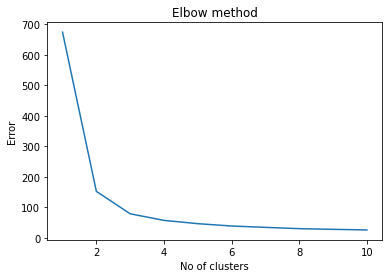

In [11]:
# Cari cluster optimal
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [12]:
# Ketemu cluster optimal = 3 - proses KMeans dengan 3 cluster
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x_kmeans)
print(y_kmeans3)
kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2
 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2
 0]


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

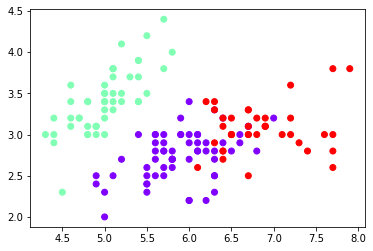

In [13]:
# Visualisasikan
plt.scatter(x_kmeans[:, 0], x_kmeans[:, 1], c=y_kmeans3, cmap='rainbow')